In [1]:
import pandas as pd

# Cargar el archivo Excel
data = pd.read_excel('VentasZapateriaLaBendicion.xlsx')

# Ver las primeras filas
data.head()


,Fecha de Venta,ID del Producto,Cantidad Vendida,Precio por Unidad,Total de Venta
0,2024-01-01,P004,7,42.59,298.13
1,2024-01-02,P005,9,19.44,174.96
2,2024-01-03,P003,8,13.39,107.12
3,2024-01-04,P005,12,6.83,81.96
4,2024-01-05,P005,2,31.59,63.18


In [2]:
# Obtener estadísticas descriptivas
data.describe()


,Fecha de Venta,Cantidad Vendida,Precio por Unidad,Total de Venta
count,100,100.000000,100.000000,100.000000
mean,2024-02-19 12:00:00,9.530000,28.406900,262.757700
min,2024-01-01 00:00:00,1.000000,5.230000,15.680000
25%,2024-01-25 18:00:00,5.000000,15.955000,82.777500
50%,2024-02-19 12:00:00,9.000000,30.315000,212.775000
75%,2024-03-15 06:00:00,15.000000,40.260000,402.690000
max,2024-04-09 00:00:00,20.000000,49.550000,864.880000
std,NaN,5.948355,13.523822,220.072028


In [3]:
# Ventas totales por producto
ventas_por_producto = data.groupby('ID del Producto')['Total de Venta'].sum()
print(ventas_por_producto)


ID del Producto
P001    5792.43
P002    6257.53
P003    3413.62
P004    6533.98
P005    4278.21
Name: Total de Venta, dtype: float64


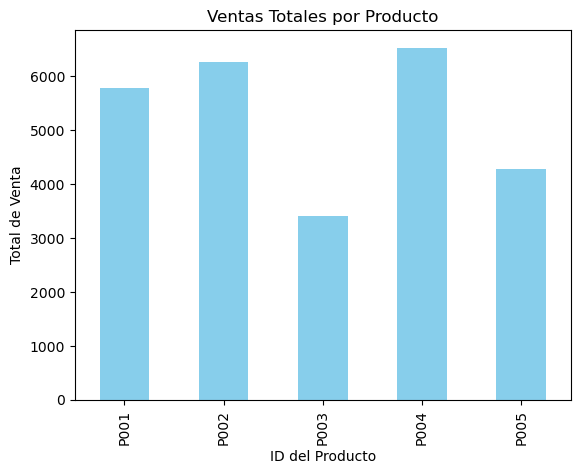

In [4]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
ventas_por_producto.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Producto')
plt.ylabel('Total de Venta')
plt.xlabel('ID del Producto')
plt.show()


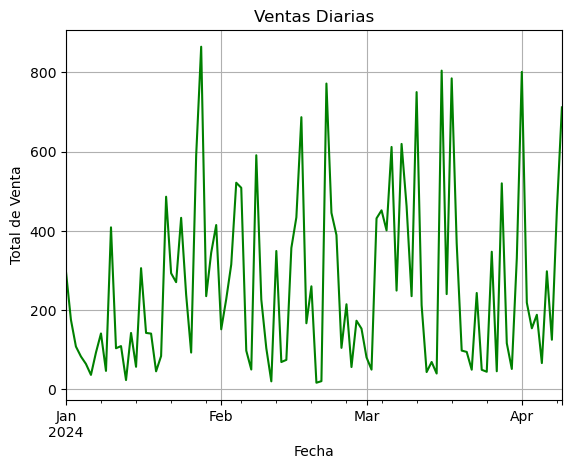

In [5]:
# Sumar ventas por fecha
ventas_diarias = data.groupby('Fecha de Venta')['Total de Venta'].sum()

# Gráfico de línea de las ventas diarias
ventas_diarias.plot(kind='line', color='green')
plt.title('Ventas Diarias')
plt.ylabel('Total de Venta')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()


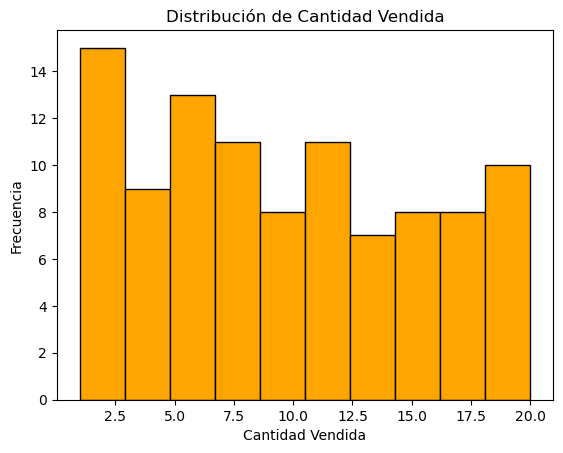

In [6]:
# Histograma de cantidad vendida
data['Cantidad Vendida'].plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Distribución de Cantidad Vendida')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.show()


ID del Producto
P001    32.852778
P002    27.830476
P003    25.510625
P004    26.414231
P005    29.997895
Name: Precio por Unidad, dtype: float64


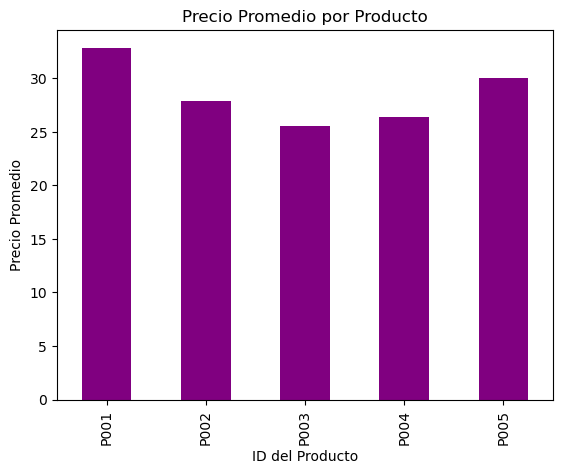

In [7]:
# Promedio de precio por producto
precio_promedio_producto = data.groupby('ID del Producto')['Precio por Unidad'].mean()
print(precio_promedio_producto)

# Gráfico de barras para visualizar
precio_promedio_producto.plot(kind='bar', color='purple')
plt.title('Precio Promedio por Producto')
plt.ylabel('Precio Promedio')
plt.xlabel('ID del Producto')
plt.show()


In [17]:
# Supongamos que añadimos una columna de 'Costo de los Productos Vendidos (CPV)'
# Añade la columna CPV al DataFrame
data['Costo de los Productos Vendidos'] = data['Cantidad Vendida'] * np.round(np.random.uniform(2, 40, size=len(data)), 2)

# Calcular la Utilidad Bruta (Total de Venta - Costo de los Productos Vendidos)
data['Utilidad Bruta'] = data['Total de Venta'] - data['Costo de los Productos Vendidos']

# Calcular el Margen de Utilidad Bruta (%)
data['Margen de Utilidad Bruta (%)'] = (data['Utilidad Bruta'] / data['Total de Venta']) * 100

# Ver las primeras filas con los cálculos de utilidad bruta
data[['Total de Venta', 'Costo de los Productos Vendidos', 'Utilidad Bruta', 'Margen de Utilidad Bruta (%)']].head()


,Total de Venta,Costo de los Productos Vendidos,Utilidad Bruta,Margen de Utilidad Bruta (%)
0,298.13,101.22,196.91,66.048368
1,174.96,182.88,-7.92,-4.526749
2,107.12,296.72,-189.60,-176.997760
3,81.96,46.56,35.40,43.191801
4,63.18,20.14,43.04,68.122824


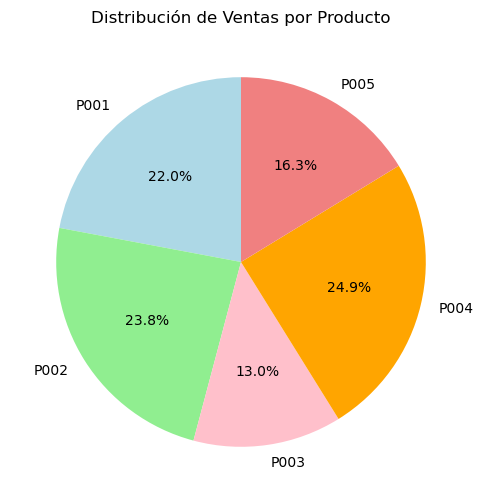

In [9]:
# Distribución de ventas totales por producto
ventas_por_producto = data.groupby('ID del Producto')['Total de Venta'].sum()

# Gráfico de pie
ventas_por_producto.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors=['lightblue', 'lightgreen', 'pink', 'orange', 'lightcoral'])
plt.title('Distribución de Ventas por Producto')
plt.ylabel('')  # Eliminar el texto del eje Y
plt.show()


In [18]:
# Añadimos una columna de 'Gastos Operativos' ficticios
data['Gastos Operativos'] = np.round(np.random.uniform(50, 500, size=len(data)), 2)

# Calcular la Utilidad Neta (Utilidad Bruta - Gastos Operativos)
data['Utilidad Neta'] = data['Utilidad Bruta'] - data['Gastos Operativos']

# Ver las primeras filas con el cálculo de utilidad neta
data[['Total de Venta', 'Utilidad Bruta', 'Gastos Operativos', 'Utilidad Neta']].head()


,Total de Venta,Utilidad Bruta,Gastos Operativos,Utilidad Neta
0,298.13,196.91,453.41,-256.50
1,174.96,-7.92,149.14,-157.06
2,107.12,-189.60,416.17,-605.77
3,81.96,35.40,474.30,-438.90
4,63.18,43.04,61.48,-18.44


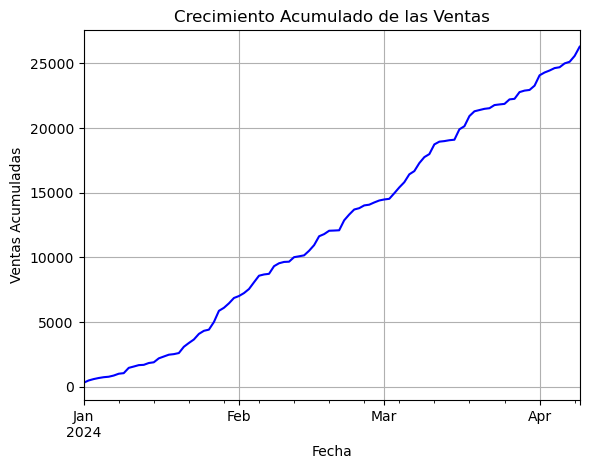

In [12]:
# Sumar ventas por fecha para ver el crecimiento acumulado
ventas_acumuladas = data.groupby('Fecha de Venta')['Total de Venta'].sum().cumsum()

# Graficar el crecimiento de las ventas
ventas_acumuladas.plot(kind='line', color='blue')
plt.title('Crecimiento Acumulado de las Ventas')
plt.ylabel('Ventas Acumuladas')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()


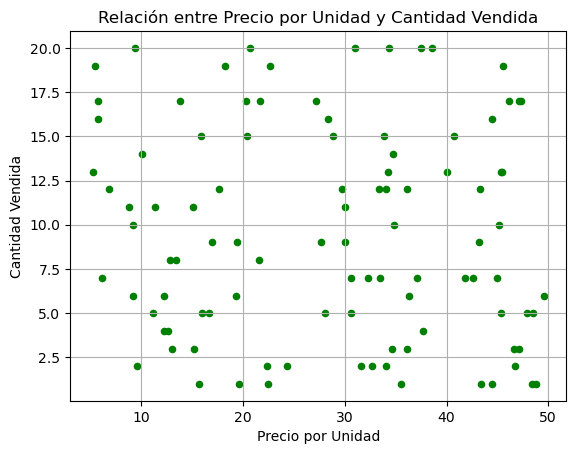

In [13]:
# Gráfico de dispersión para la relación entre precio y cantidad vendida
data.plot(kind='scatter', x='Precio por Unidad', y='Cantidad Vendida', color='green')
plt.title('Relación entre Precio por Unidad y Cantidad Vendida')
plt.xlabel('Precio por Unidad')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Convertir fechas a números para la regresión
data['Fecha de Venta Num'] = pd.to_datetime(data['Fecha de Venta']).map(pd.Timestamp.toordinal)

# Definir variables para el modelo
X = data[['Fecha de Venta Num']]  # Variable independiente (fecha)
y = data['Total de Venta']  # Variable dependiente (total de venta)

# Separar datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Comparar los resultados reales y predichos
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(resultados.head())


      Real  Predicción
83   48.36  294.952338
53  444.99  266.851326
70  750.20  282.775232
45  356.28  259.357723
44   73.44  258.421022


In [15]:
# Calcular la correlación entre las columnas
correlacion = data[['Cantidad Vendida', 'Precio por Unidad', 'Total de Venta']].corr()
print(correlacion)


                   Cantidad Vendida  Precio por Unidad  Total de Venta
Cantidad Vendida           1.000000          -0.099950        0.727521
Precio por Unidad         -0.099950           1.000000        0.508653
Total de Venta             0.727521           0.508653        1.000000


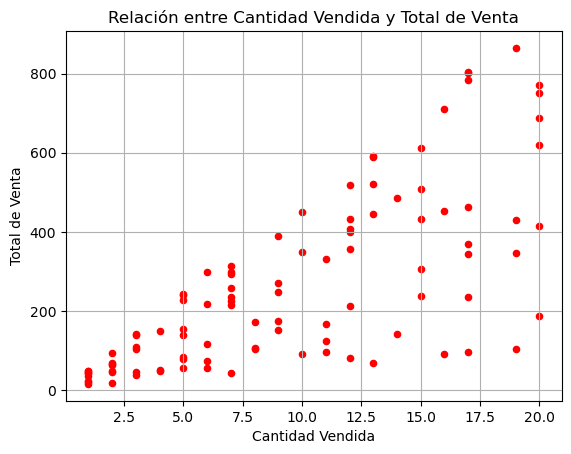

In [16]:
# Gráfico de dispersión
data.plot(kind='scatter', x='Cantidad Vendida', y='Total de Venta', color='red')
plt.title('Relación entre Cantidad Vendida y Total de Venta')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Total de Venta')
plt.grid(True)
plt.show()
